In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
import category_encoders as ce
import scipy.stats as stats
from scipy.stats import chi2_contingency, levene
import pingouin as pg
from collections import Counter
from scipy.stats import kruskal




df_org = pd.read_csv(r"census_income_original_2.csv")
def create_family_status(row):
    if row['marital.status'] == 'Married-civ-spouse':
        return 'Married-with-family' if row['relationship'] in ['Husband', 'Wife'] else 'Married-alone'
        
    if row['marital.status'] == 'Never-married':
        return 'Single-with-family' if row['relationship'] in ['Own-child', 'Other-relative'] else 'Single-alone'
        
    if row['marital.status'] == 'Divorced':
        return 'Divorced-with-family' if row['relationship'] != 'Not-in-family' else 'Divorced-alone'
        
    if row['marital.status'] == 'Widowed':
        return 'Widowed-with-family' if row['relationship'] != 'Not-in-family' else 'Widowed-alone'
        
    if row['marital.status'] == 'Separated':
        return 'Separated-with-family' if row['relationship'] != 'Not-in-family' else 'Separated-alone'
    
    return 'Not-in-Family' 


C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_3140\1614064415.py:17: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_org = pd.read_csv(r"census_income_original_2.csv")


In [19]:


# clean
df = df_org.copy()

# combine net gain and loss
df['capital.loss'] = df['capital.loss'] * -1
df['net_capital'] = df['capital.gain'] + df['capital.loss']
df['net_capital'] = df['net_capital'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

df.drop(columns=['capital.gain', 'capital.loss'], inplace=True)

# encode income
df['income>50k'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


# handlin income_value missing values
df['income_value'] = pd.to_numeric(df['income_value'], errors='coerce')
df['income_value_encoded'] = np.where(
    (df['income>50k'] == 1) & (df['income_value'] > 50000), 1,
    np.where(
        (df['income>50k'] == 0) & (df['income_value'] <= 50000), -1,
        0 
    )
)
#df.drop(columns=[ 'income', 'income_value'], inplace=True)
#df.drop(columns=[ 'ID', 'native.country', 'education','race'], inplace=True)


# handling missing catigorical variables
cat_cols = ['Gender', 'education.num', 'relationship', 'marital.status', 'occupation', 'net_capital', 'workclass', 'income>50k']
cont_cols = ['age', 'hours.per.week']
#cat_cols = ['relationship', 'occupation', 'education', 'marital.status', 'workclass']

for col in cat_cols:
    df[col] = df[col].replace('?', np.nan)
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)
df['family_status'] = df.apply(create_family_status, axis=1)

#encode gender
mapping = {
    'm': 0,'m ': 0,'M': 0,'malee': 0,'male ': 0,'male': 0,'Male': 0,'Female': 1,'female': 1,'f': 1
}
df['Gender'] = df['Gender'].map(mapping)

#df = pd.get_dummies(df, columns=cat_cols[:-1])


# rescale
scaler = MinMaxScaler()
#f_scaled = scaler.fit_transform(df[['age', 'hours.per.week']])
#df[['age', 'hours.per.week']] = df_scaled


quantile_transformer = QuantileTransformer(output_distribution='uniform', random_state=42)
#df[['age', 'hours.per.week']] = quantile_transformer.fit_transform(df[['age', 'hours.per.week']])
df.drop(columns=[ 'ID', 'education', 'race', 'native.country', 'workclass'], inplace=True)




Analyzing age vs relationship...


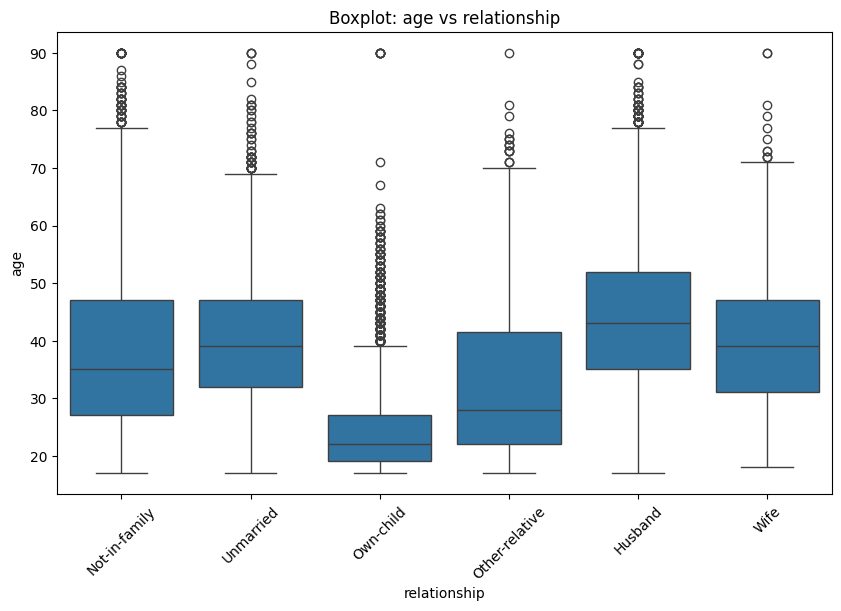

Multiple categories detected in relationship, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 8914.7692, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of relationship in terms of age.
-----------------------------------------


Analyzing hours.per.week vs relationship...


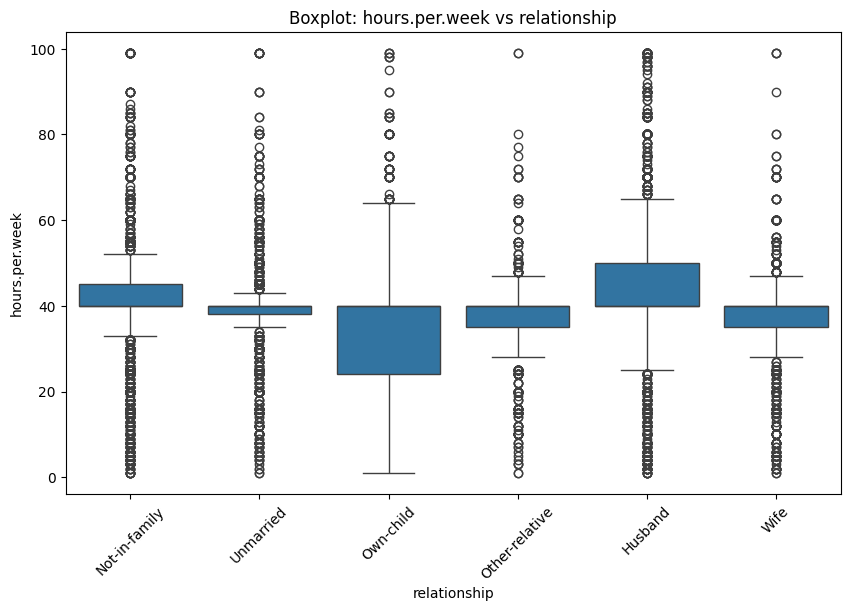

Multiple categories detected in relationship, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 3907.8250, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of relationship in terms of hours.per.week.
-----------------------------------------


Analyzing income_value vs relationship...


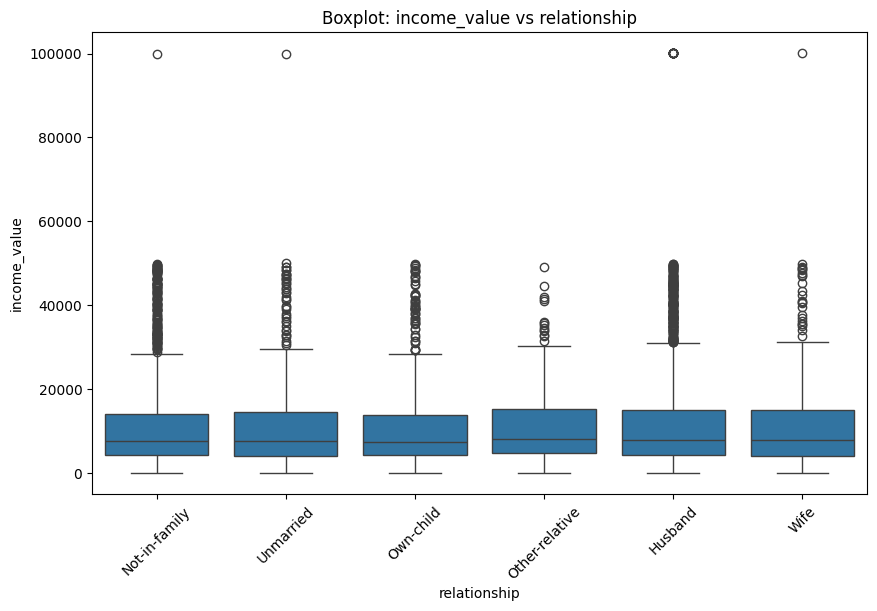

Multiple categories detected in relationship, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = nan, p-value = nan
Conclusion: No significant difference found between the categories of relationship in terms of income_value.
-----------------------------------------


Analyzing age vs marital.status...


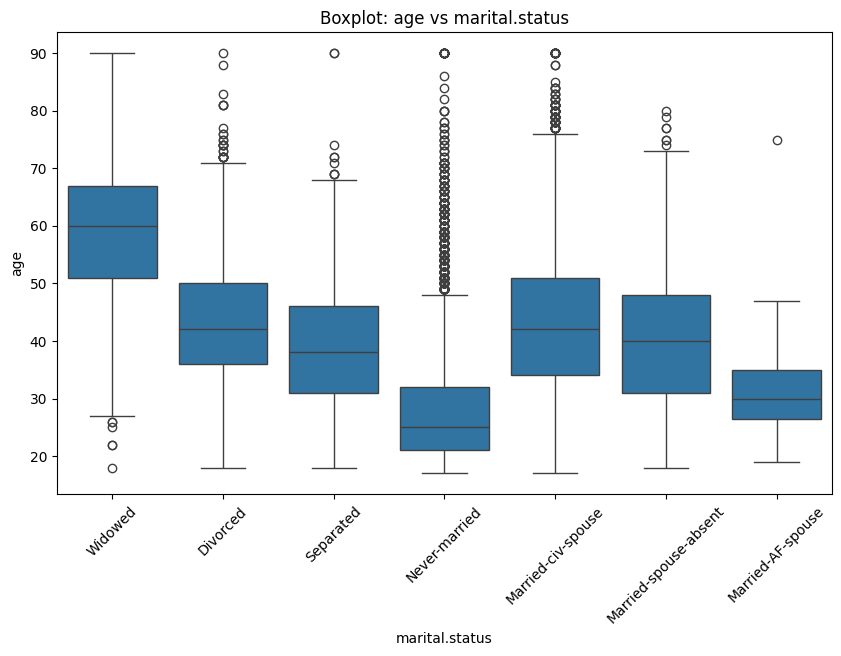

Multiple categories detected in marital.status, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 11916.0776, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of marital.status in terms of age.
-----------------------------------------


Analyzing hours.per.week vs marital.status...


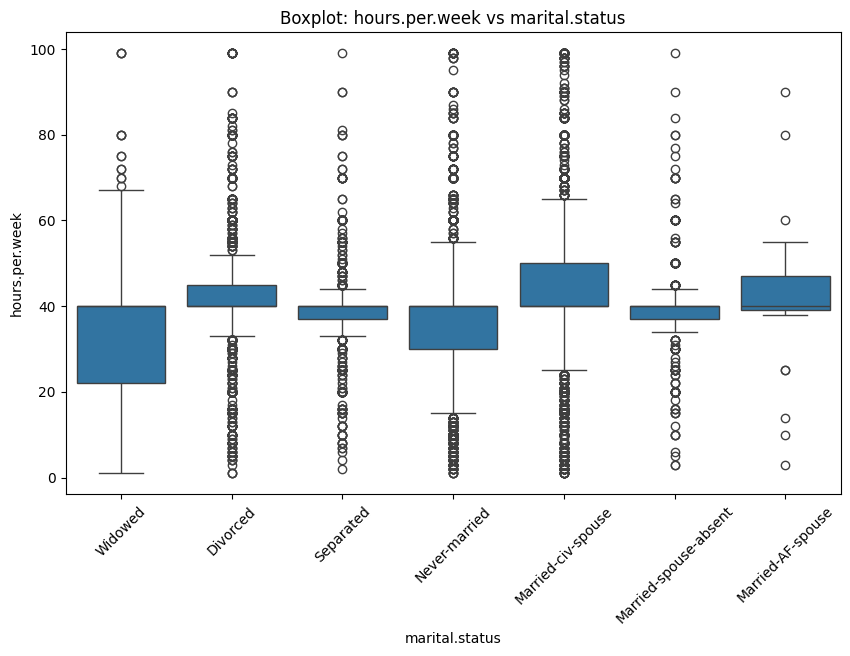

Multiple categories detected in marital.status, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 2502.5640, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of marital.status in terms of hours.per.week.
-----------------------------------------


Analyzing income_value vs marital.status...


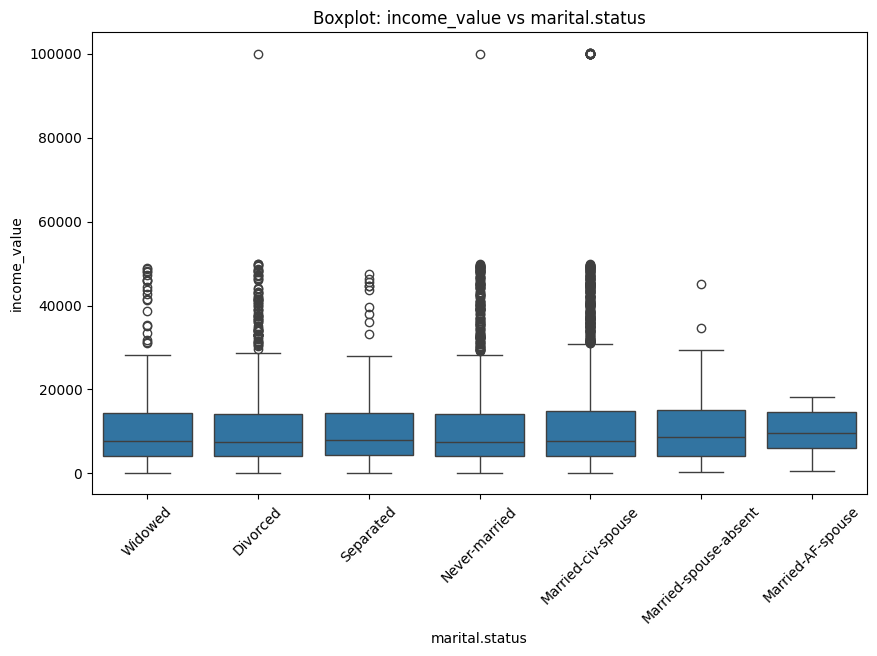

Multiple categories detected in marital.status, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = nan, p-value = nan
Conclusion: No significant difference found between the categories of marital.status in terms of income_value.
-----------------------------------------


Analyzing age vs occupation...


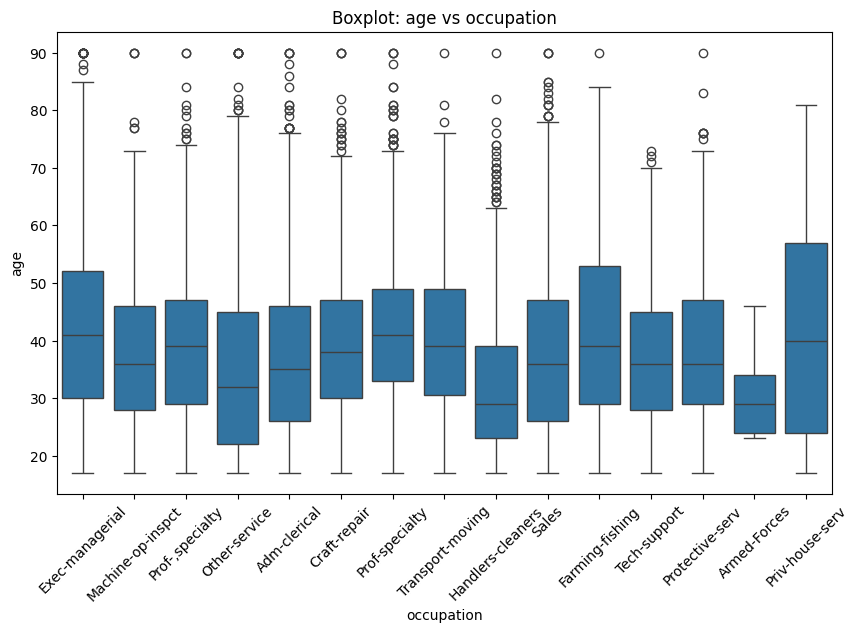

Multiple categories detected in occupation, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 1324.1817, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of occupation in terms of age.
-----------------------------------------


Analyzing hours.per.week vs occupation...


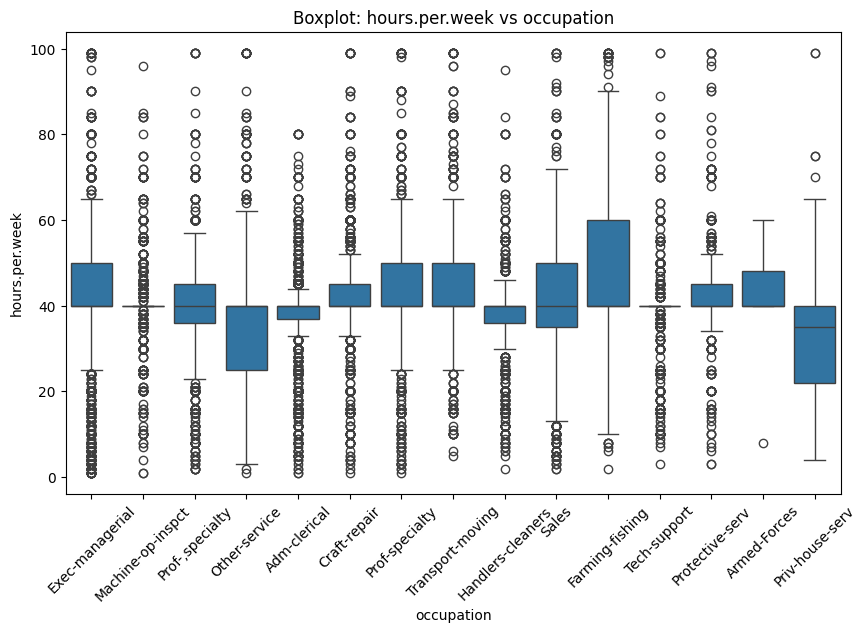

Multiple categories detected in occupation, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 2475.2130, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of occupation in terms of hours.per.week.
-----------------------------------------


Analyzing income_value vs occupation...


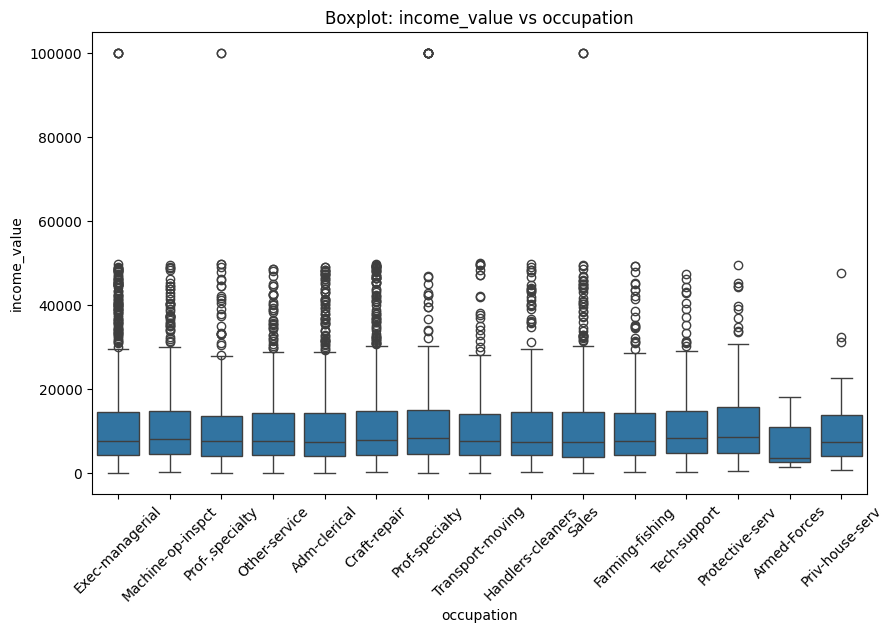

Multiple categories detected in occupation, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = nan, p-value = nan
Conclusion: No significant difference found between the categories of occupation in terms of income_value.
-----------------------------------------


Analyzing age vs net_capital...


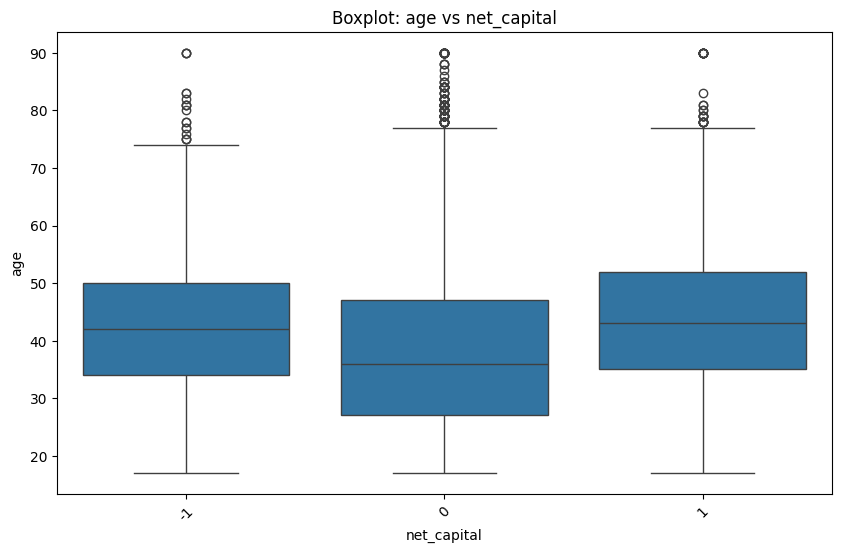

Multiple categories detected in net_capital, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 762.3562, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of net_capital in terms of age.
-----------------------------------------


Analyzing hours.per.week vs net_capital...


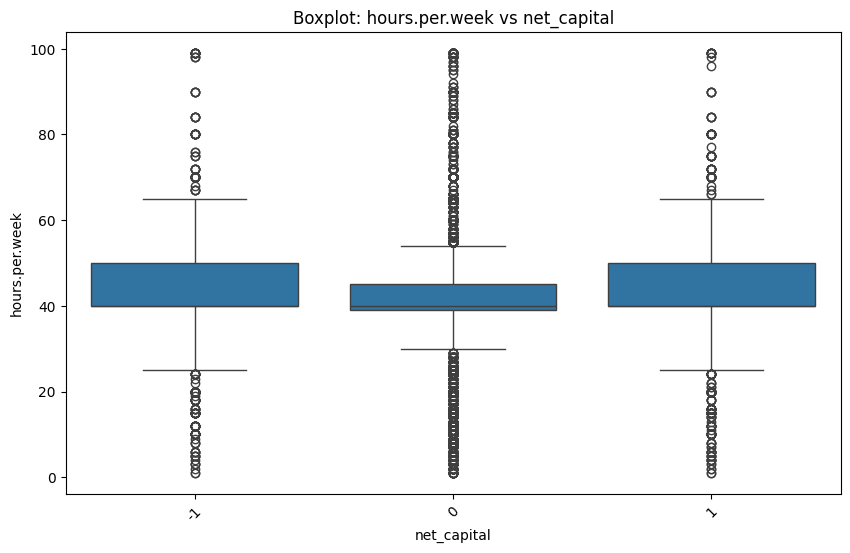

Multiple categories detected in net_capital, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 517.4290, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of net_capital in terms of hours.per.week.
-----------------------------------------


Analyzing income_value vs net_capital...


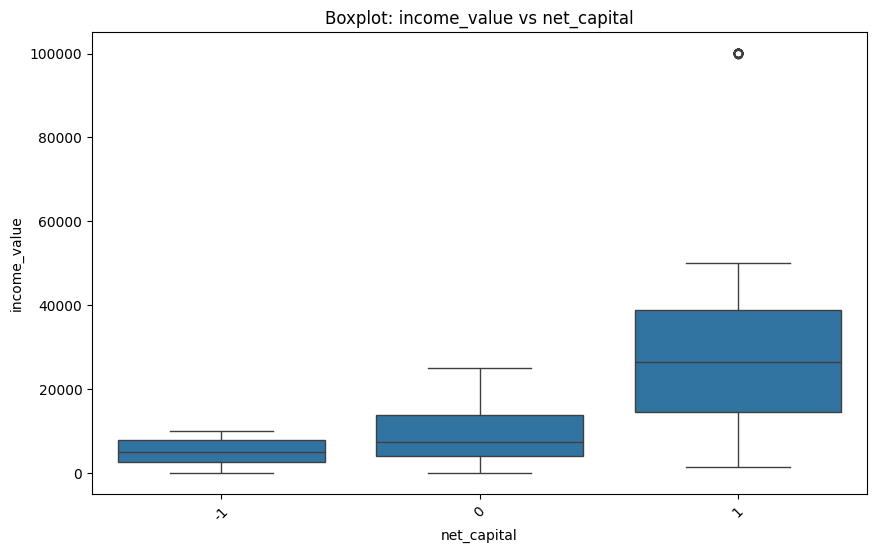

Multiple categories detected in net_capital, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = nan, p-value = nan
Conclusion: No significant difference found between the categories of net_capital in terms of income_value.
-----------------------------------------


Analyzing age vs income>50k...


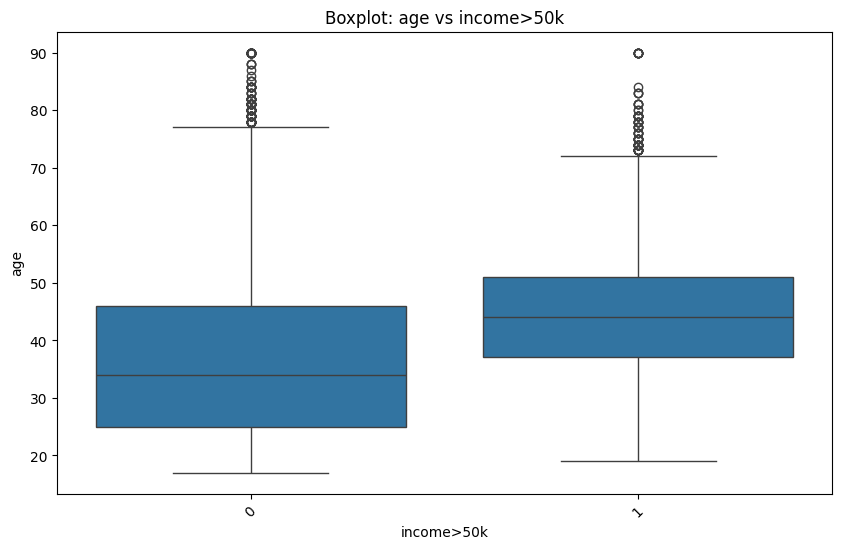

Two categories detected in income>50k, performing Mann-Whitney U Test...
Mann-Whitney U Test: Statistic = 65875663.0000, p-value = 0.0000
Conclusion: There is a significant difference between the two categories of income>50k with respect to age.
-----------------------------------------


Analyzing hours.per.week vs income>50k...


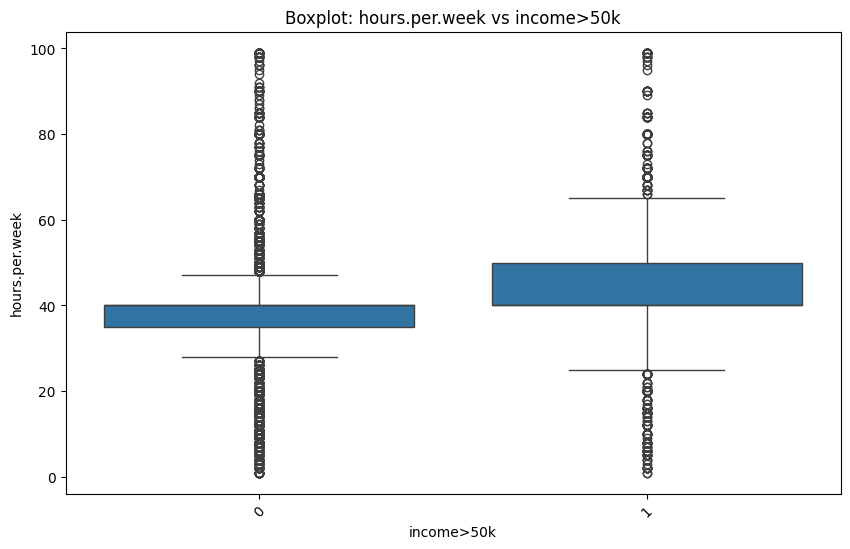

Two categories detected in income>50k, performing Mann-Whitney U Test...
Mann-Whitney U Test: Statistic = 68401469.5000, p-value = 0.0000
Conclusion: There is a significant difference between the two categories of income>50k with respect to hours.per.week.
-----------------------------------------


Analyzing income_value vs income>50k...


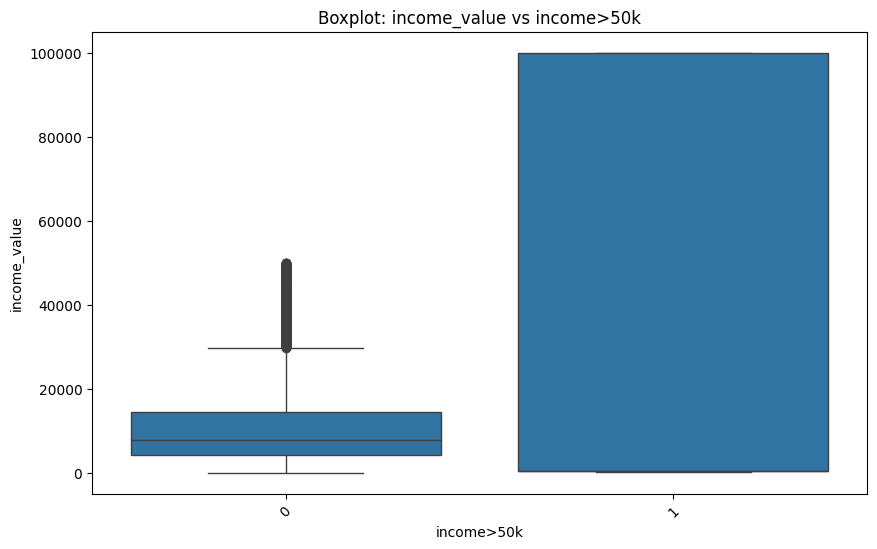

Two categories detected in income>50k, performing Mann-Whitney U Test...
Mann-Whitney U Test: Statistic = nan, p-value = nan
Conclusion: No significant difference found between the two categories of income>50k with respect to income_value.
-----------------------------------------


Analyzing age vs Gender...


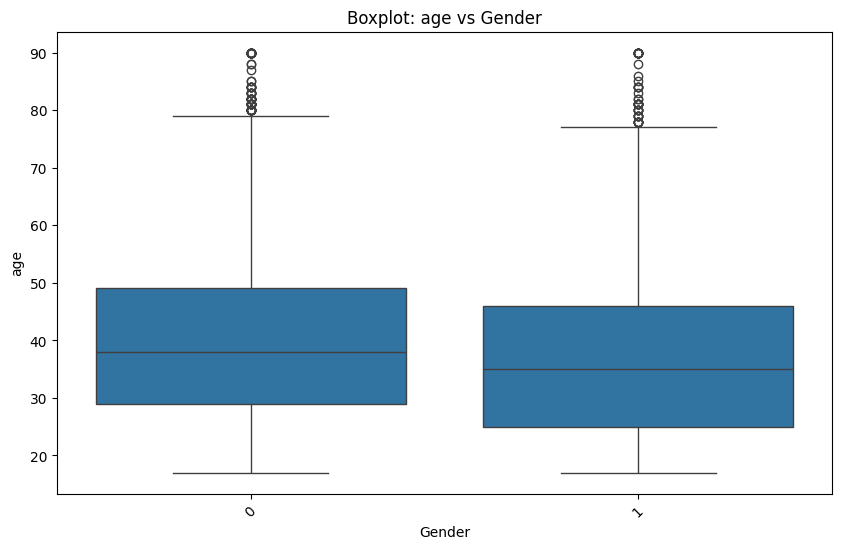

Two categories detected in Gender, performing Mann-Whitney U Test...
Mann-Whitney U Test: Statistic = 106870482.5000, p-value = 0.0000
Conclusion: There is a significant difference between the two categories of Gender with respect to age.
-----------------------------------------


Analyzing hours.per.week vs Gender...


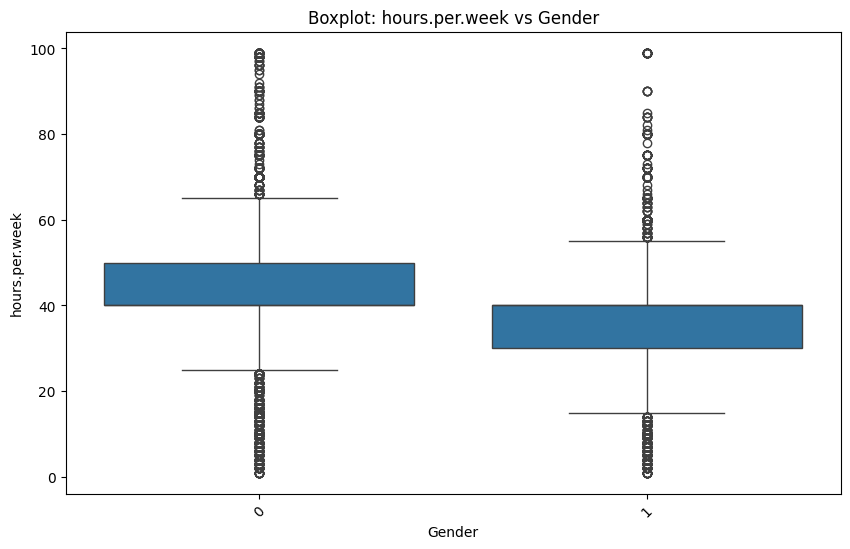

Two categories detected in Gender, performing Mann-Whitney U Test...
Mann-Whitney U Test: Statistic = 84211312.5000, p-value = 0.0000
Conclusion: There is a significant difference between the two categories of Gender with respect to hours.per.week.
-----------------------------------------


Analyzing income_value vs Gender...


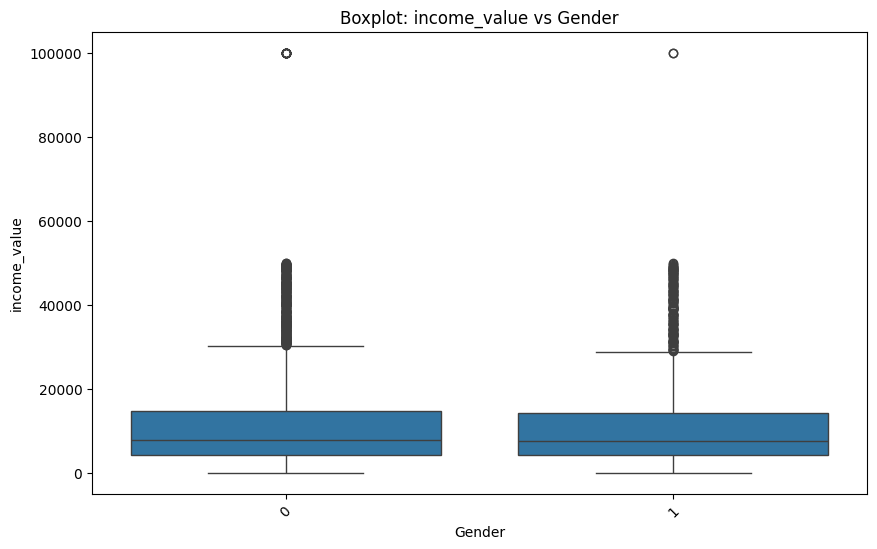

Two categories detected in Gender, performing Mann-Whitney U Test...
Mann-Whitney U Test: Statistic = nan, p-value = nan
Conclusion: No significant difference found between the two categories of Gender with respect to income_value.
-----------------------------------------


Analyzing age vs education.num...


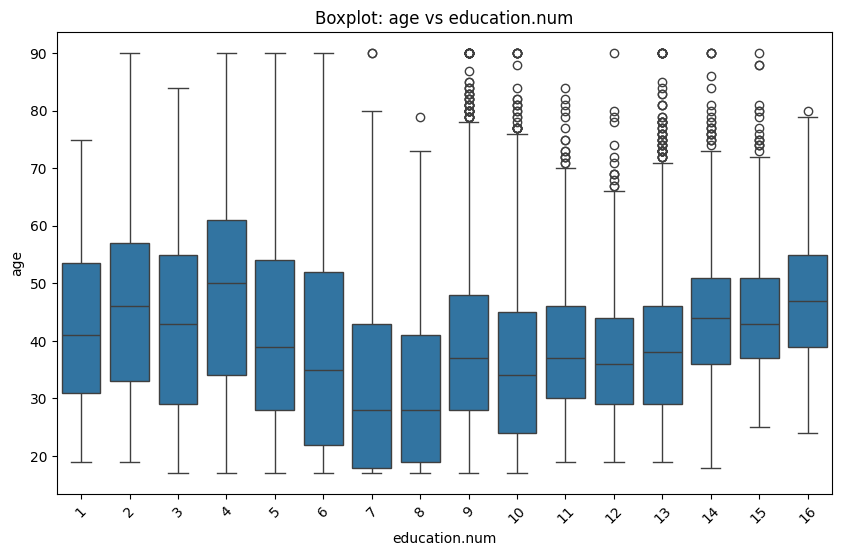

Multiple categories detected in education.num, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 1916.0275, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of education.num in terms of age.
-----------------------------------------


Analyzing hours.per.week vs education.num...


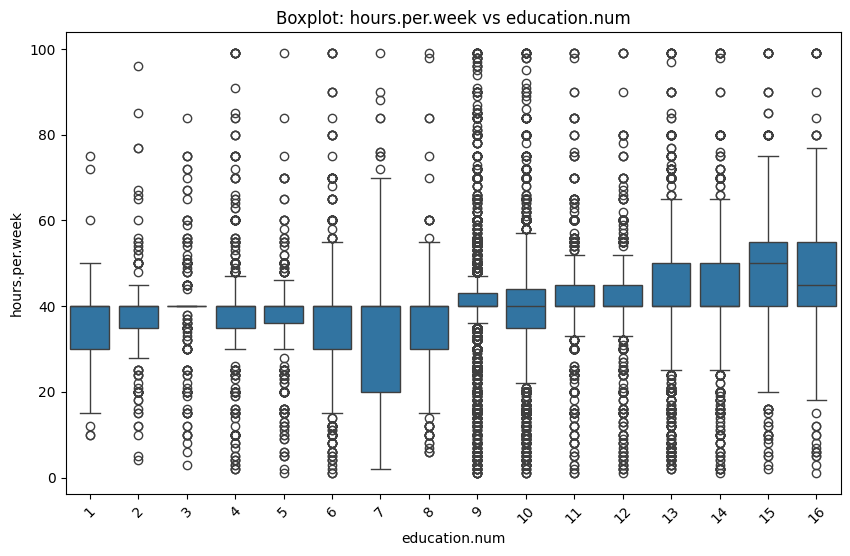

Multiple categories detected in education.num, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 1557.9638, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of education.num in terms of hours.per.week.
-----------------------------------------


Analyzing income_value vs education.num...


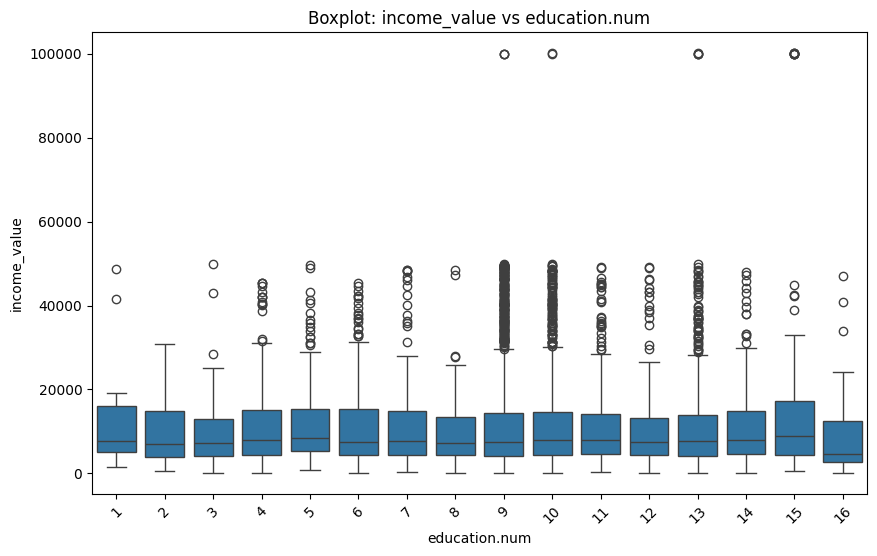

Multiple categories detected in education.num, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = nan, p-value = nan
Conclusion: No significant difference found between the categories of education.num in terms of income_value.
-----------------------------------------


Analyzing age vs family_status...


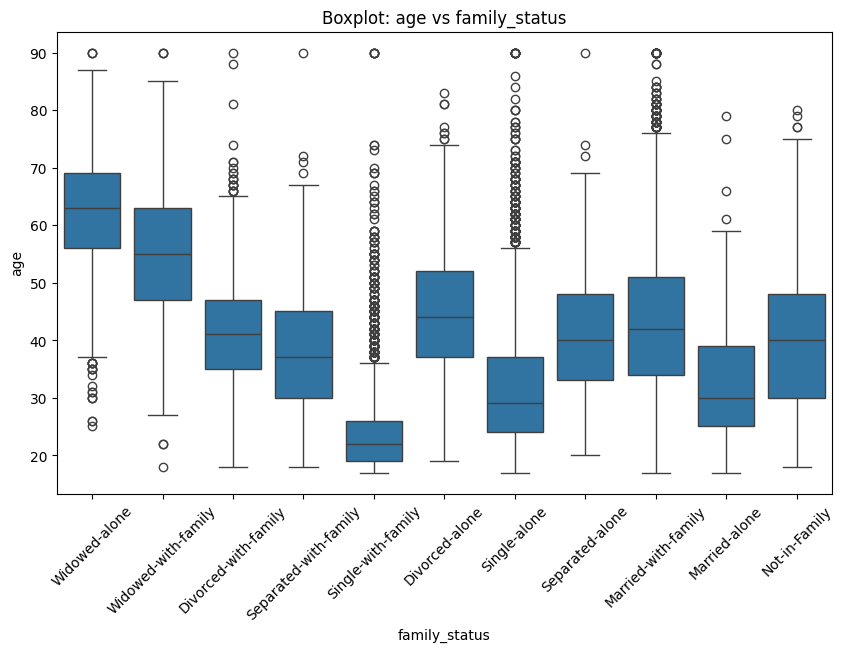

Multiple categories detected in family_status, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 13311.5274, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of family_status in terms of age.
-----------------------------------------


Analyzing hours.per.week vs family_status...


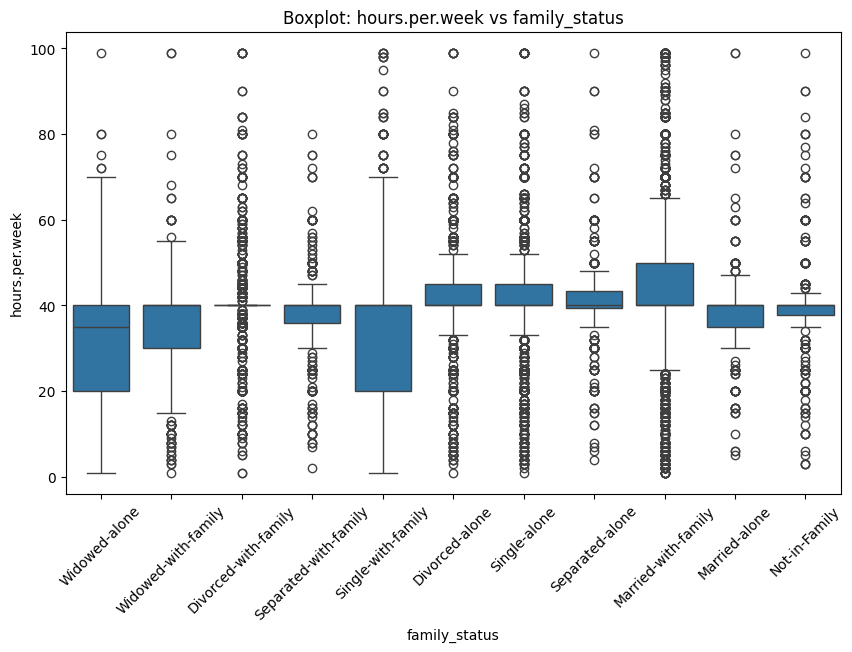

Multiple categories detected in family_status, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 3669.0227, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of family_status in terms of hours.per.week.
-----------------------------------------


Analyzing income_value vs family_status...


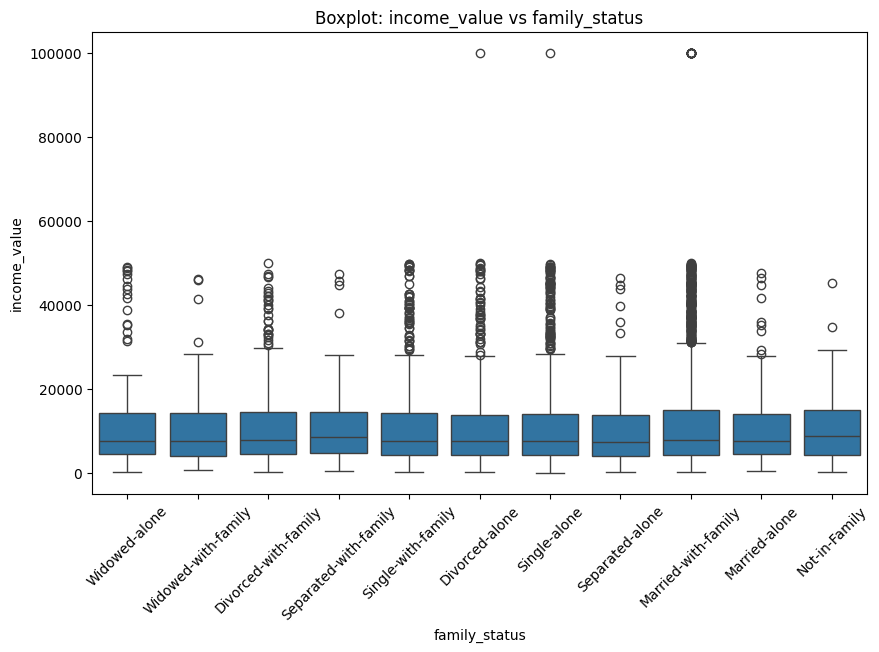

Multiple categories detected in family_status, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = nan, p-value = nan
Conclusion: No significant difference found between the categories of family_status in terms of income_value.
-----------------------------------------



In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

def cat_vs_cont_analysis(df, cat_cols, cont_cols):
    for cat_col in cat_cols:
        for cont_col in cont_cols:
            print(f"\nAnalyzing {cont_col} vs {cat_col}...")

            # Visualize the distribution of the continuous variable across categories
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=cat_col, y=cont_col)
            plt.title(f"Boxplot: {cont_col} vs {cat_col}")
            plt.xticks(rotation=45)  
            plt.show()

            # Get the unique categories in the categorical column
            categories = df[cat_col].unique()

            # Kruskal-Wallis H Test if more than two categories
            if len(categories) > 2:
                print(f"Multiple categories detected in {cat_col}, performing Kruskal-Wallis H Test...")
                # Prepare data for Kruskal-Wallis Test
                data = [df[df[cat_col] == category][cont_col] for category in categories]
                stat, p_value = stats.kruskal(*data)

                # Kruskal-Wallis Test Result
                print(f"Kruskal-Wallis H Test: Statistic = {stat:.4f}, p-value = {p_value:.4f}")
                if p_value < 0.05:
                    print(f"Conclusion: There is a statistically significant difference between the categories of {cat_col} in terms of {cont_col}.")
                else:
                    print(f"Conclusion: No significant difference found between the categories of {cat_col} in terms of {cont_col}.")
            else:
                print(f"Two categories detected in {cat_col}, performing Mann-Whitney U Test...")
                # Prepare data for Mann-Whitney U Test
                category1_data = df[df[cat_col] == categories[0]][cont_col]
                category2_data = df[df[cat_col] == categories[1]][cont_col]
                stat, p_value = stats.mannwhitneyu(category1_data, category2_data)

                # Mann-Whitney U Test Result
                print(f"Mann-Whitney U Test: Statistic = {stat:.4f}, p-value = {p_value:.4f}")
                if p_value < 0.05:
                    print(f"Conclusion: There is a significant difference between the two categories of {cat_col} with respect to {cont_col}.")
                else:
                    print(f"Conclusion: No significant difference found between the two categories of {cat_col} with respect to {cont_col}.")

            print(f"-----------------------------------------\n")


cat_cols = [ 'relationship', 'marital.status', 'occupation', 'net_capital', 'income>50k', 'Gender', 'education.num', 'family_status']
cat_col = [ 'occupation', 'net_capital', 'income>50k', 'Gender', 'education.num', 'family_status', 'income_value_encoded']
cont_cols = ['age', 'hours.per.week', 'income_value']

# Call the function
cat_vs_cont_analysis(df, cat_cols, cont_cols)


Analyzing age vs income>50k...


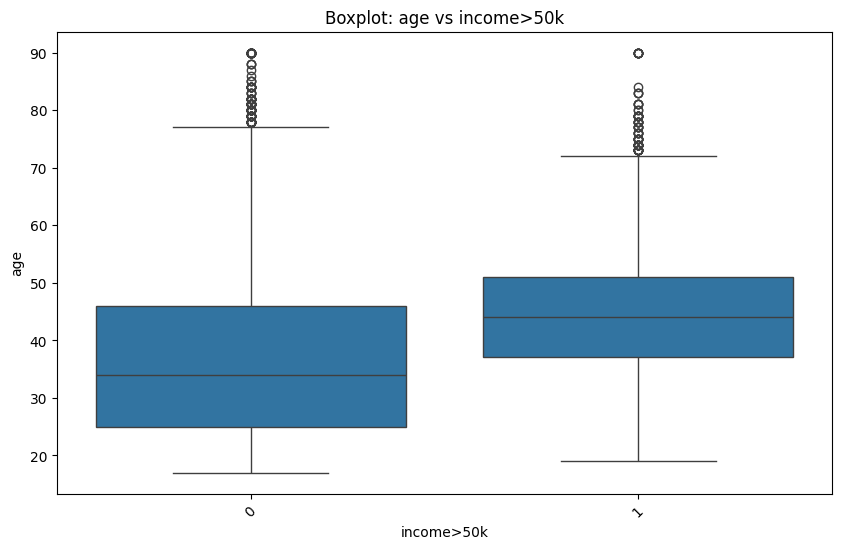

Two categories detected in income>50k, performing Mann-Whitney U Test...
Mann-Whitney U Test: Statistic = 65875663.0000, p-value = 0.0000
Conclusion: There is a significant difference between the two categories of income>50k with respect to age.
-----------------------------------------


Analyzing hours.per.week vs income>50k...


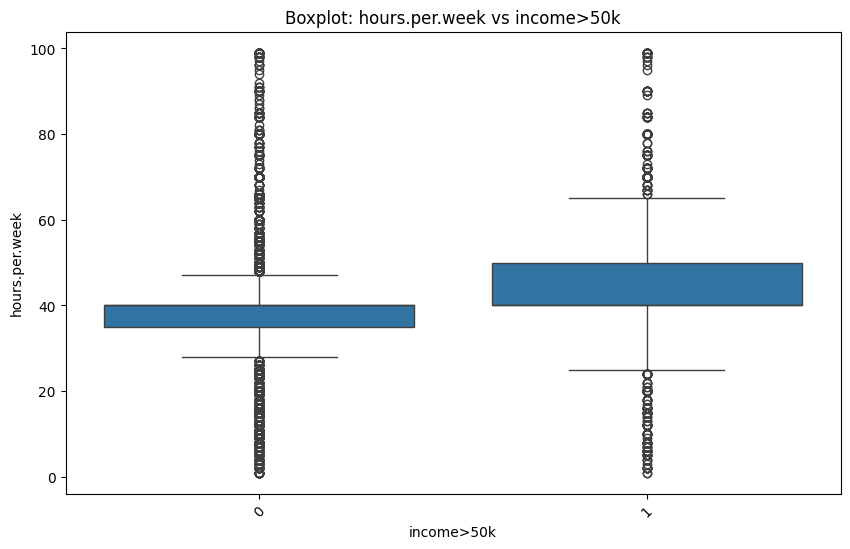

Two categories detected in income>50k, performing Mann-Whitney U Test...
Mann-Whitney U Test: Statistic = 68401469.5000, p-value = 0.0000
Conclusion: There is a significant difference between the two categories of income>50k with respect to hours.per.week.
-----------------------------------------


Analyzing age vs family_status...


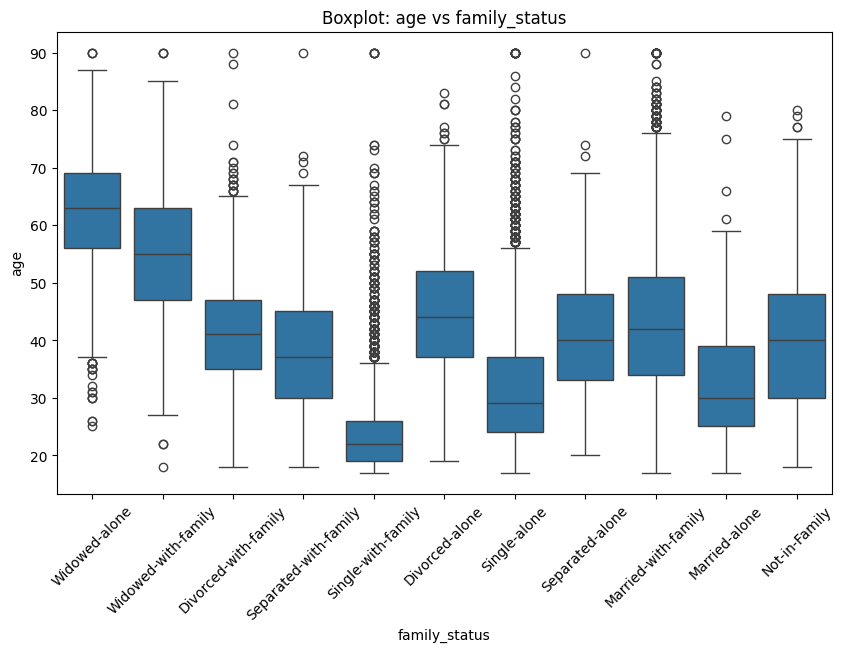

Multiple categories detected in family_status, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 13311.5274, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of family_status in terms of age.
-----------------------------------------


Analyzing hours.per.week vs family_status...


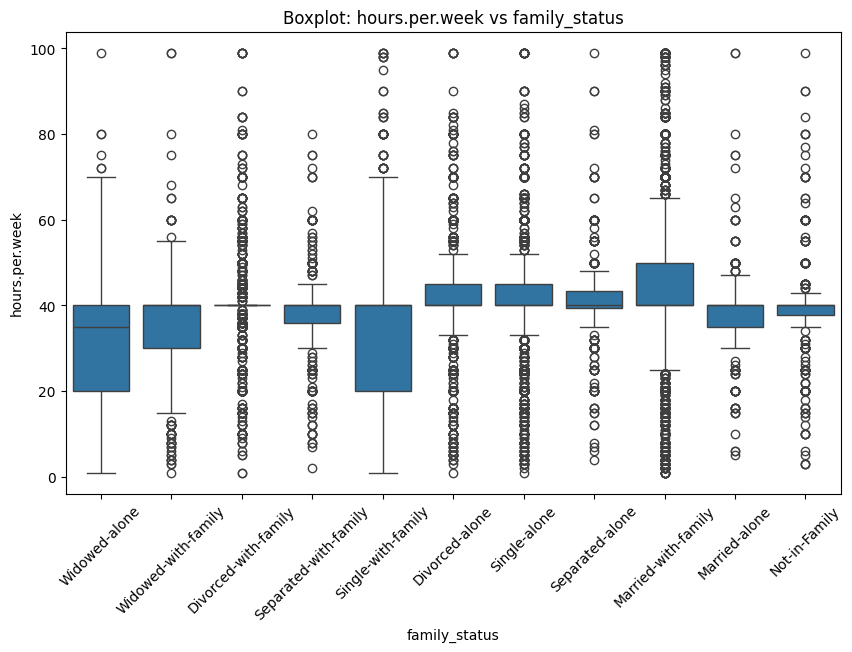

Multiple categories detected in family_status, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 3669.0227, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of family_status in terms of hours.per.week.
-----------------------------------------


Analyzing age vs income_value_encoded...


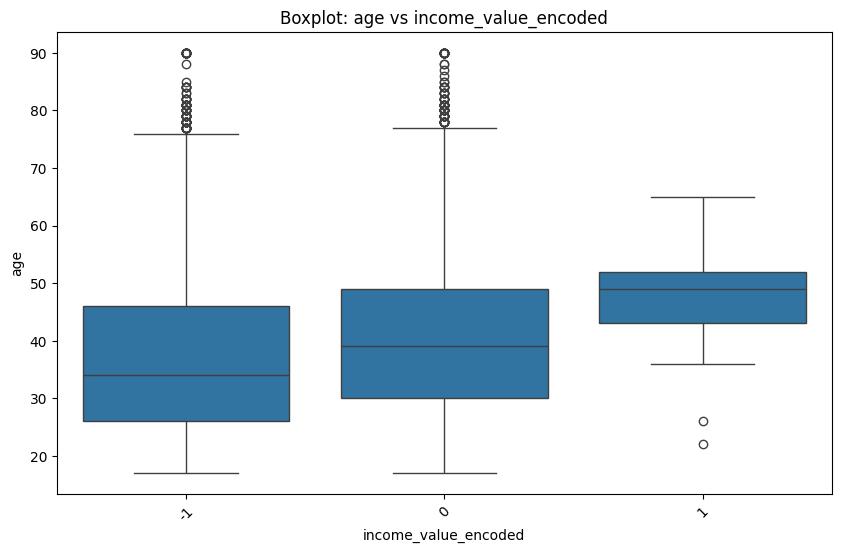

Multiple categories detected in income_value_encoded, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 449.1193, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of income_value_encoded in terms of age.
-----------------------------------------


Analyzing hours.per.week vs income_value_encoded...


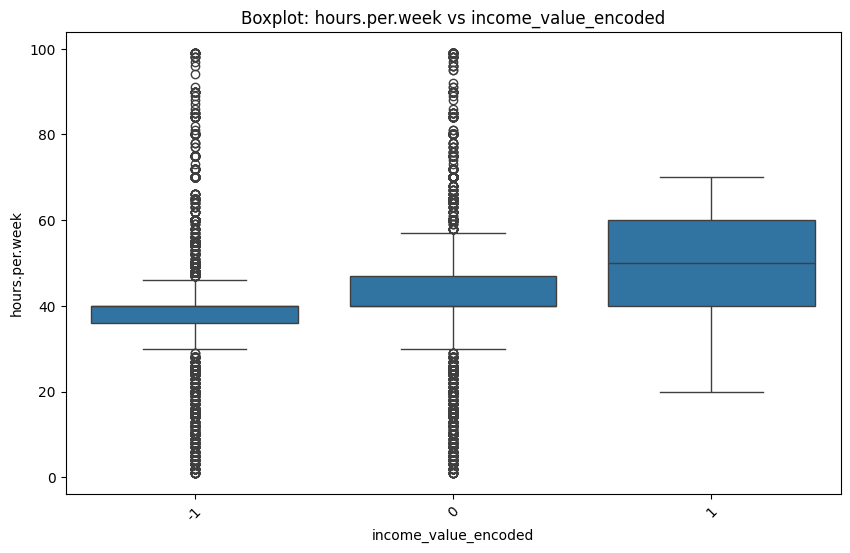

Multiple categories detected in income_value_encoded, performing Kruskal-Wallis H Test...
Kruskal-Wallis H Test: Statistic = 458.7667, p-value = 0.0000
Conclusion: There is a statistically significant difference between the categories of income_value_encoded in terms of hours.per.week.
-----------------------------------------



In [21]:
cat_cols = [  'income>50k',  'family_status', 'income_value_encoded']
cont_cols = ['age', 'hours.per.week']

# Call the function
cat_vs_cont_analysis(df, cat_cols, cont_cols)